# Music Recomeendation System

In [41]:
# !pip install wordcloud

In [42]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [43]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("../Datasets/spotify_millsongdata.csv")
df = df[:20000]  # Limit to first 1000 rows for performance
df.drop(columns=["link"], inplace=True)  # Ensure 'text' column has no NaN values

In [44]:
df.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante","Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [45]:
df.shape

(20000, 3)

In [46]:
# df.iloc[1,:]['text']

In [47]:
df.describe()

,artist,song,text
count,20000,20000,20000
unique,521,17441,19974
top,Rolling Stones,Have Yourself A Merry Little Christmas,Chestnuts roasting on an open fire \nJack Fro...
freq,172,16,3


In [48]:
df.isnull().sum()

artist    0
song      0
text      0
dtype: int64

In [49]:
df['artist'].value_counts().head(10)

artist
Rolling Stones    172
Loretta Lynn      163
Fleetwood Mac     156
Rod Stewart       144
Roxette           138
James Taylor      132
Randy Travis      123
Conway Twitty     121
ABBA              113
Air Supply        111
Name: count, dtype: int64

In [50]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

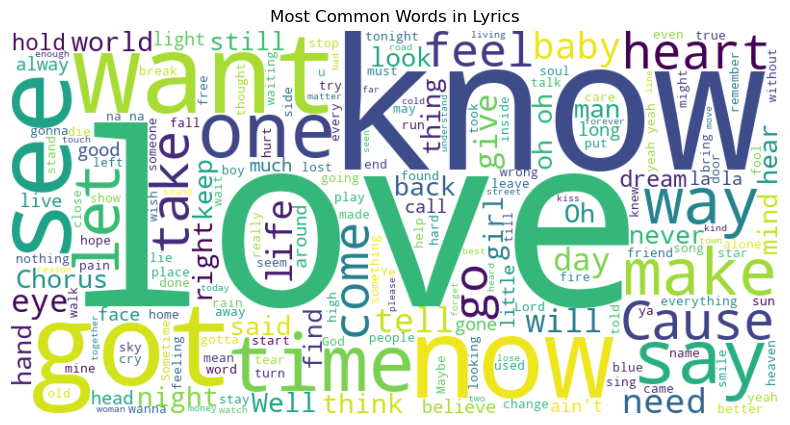

In [51]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [52]:

# download nltk data natutal language toolkit library (for sentence toknization)
nltk.download('punkt') # toknizer
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
stop_words = set(stopwords.words('english'))

In [54]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [55]:

# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [56]:
df.head()

,artist,song,text,cleaned_text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd...",look face wonderful face means something speci...
1,ABBA,"Andante, Andante","Take it easy with me, please \nTouch me gentl...",take easy please touch gently like summer even...
2,ABBA,As Good As New,I'll never know why I had to go \nWhy I had t...,ill never know go put lousy rotten show boy to...
3,ABBA,Bang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,making somebody happy question give take learn...


In [57]:

# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [58]:

# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [59]:

# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [60]:

# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
              artist                         song
18138        Roxette      For The Very First Time
2206    Carol Banawa                    I Believe
8022    Howard Jones  Let Me Be The First To Know
6327       Foreigner    Feels Like The First Time
11382  Lenny Kravitz         Looking Back On Love
